# Autoencoders: Dimensionality Reduction to Find Most Different Classes

This is an example-exercise proposed by Portilla after the end of the section related to the Autoencoders.

We have a dataset describing 17 food consumption amounts (in grams/person-week) against 4 regions in the UK.
The goal is to detect the region which most differs from the rest.
That is difficult looking at the 17 variables, but we can achieve it by applying dimensionality reduction:
we reduce the 17 variables to 2 and plot them on a plane;
the point of the region which is the furthest from the others is the most different.

**IMPORTANT note:** I coded along the solution video to find out that the results are not that conclusive in my case: no region/country point separates from teh rest considerably more; additionally, the autoencoder is not that stable: quite different results appear after every run/fit.

## Data

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('../../data/UK_foods.csv',index_col='Unnamed: 0')

In [10]:
df

,England,Wales,Scotland,N.Ireland
Cheese,105,103,103,66
Carcass_meat,245,227,242,267
Other_meat,685,803,750,586
Fish,147,160,122,93
Fats_and_oils,193,235,184,209
Sugars,156,175,147,139
Fresh_potatoes,720,874,566,1033
Fresh_Veg,253,265,171,143
Other_Veg,488,570,418,355
Processed_potatoes,198,203,220,187


In [14]:
# We can transpose the dataframe in case it's easier to visualize
df.transpose()

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


<AxesSubplot:>

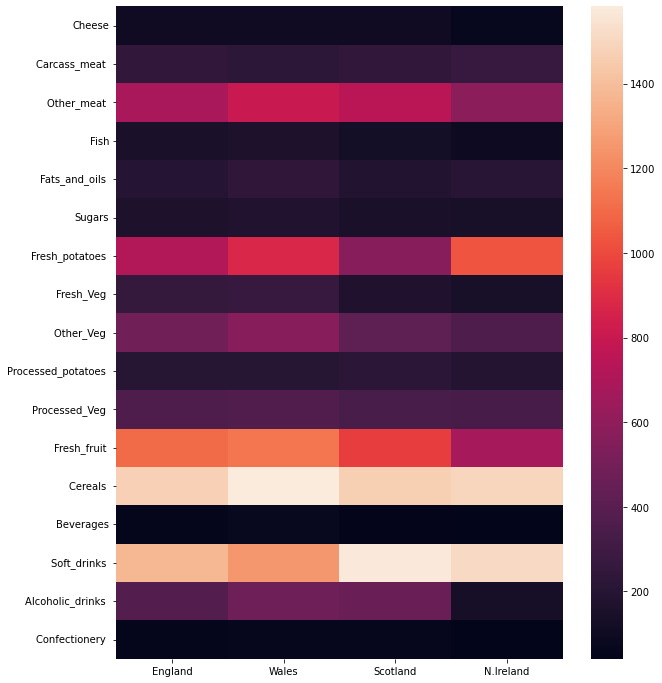

In [30]:
# Plot dataset: no obvious differences are perceptible
plt.figure(figsize=(10,12))
sns.heatmap(df)

In [157]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

In [158]:
scaler = MinMaxScaler()

In [159]:
#scaler.fit(df.transpose().values)

In [160]:
# We transpose the df so that each row contains the 17 features
#scaled_df = scaler.transform(df.transpose().values)
scaled_df = scaler.fit_transform(df.transpose().values)

In [161]:
scaled_df.shape

(4, 17)

## Model

In [162]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [163]:
# Encoder: 17 -> 8 -> 4 -> 2
encoder = Sequential()
encoder.add(Dense(units=8,activation='relu',input_shape=[17]))
encoder.add(Dense(units=4,activation='relu',input_shape=[8]))
encoder.add(Dense(units=2,activation='relu',input_shape=[4]))

In [164]:
# Decoder: 2 -> 4 -> 8 -> 17
decoder = Sequential()
decoder.add(Dense(units=4,activation='relu',input_shape=[2]))
decoder.add(Dense(units=8,activation='relu',input_shape=[4]))
decoder.add(Dense(units=17,activation='relu',input_shape=[8]))

In [165]:
# Autoencoder
autoencoder = Sequential([encoder,decoder])

In [166]:
autoencoder.compile(loss='mse',
                   optimizer=SGD(lr=1.5))

In [167]:
autoencoder.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_24 (Sequential)   (None, 2)                 190       
_________________________________________________________________
sequential_25 (Sequential)   (None, 17)                205       
Total params: 395
Trainable params: 395
Non-trainable params: 0
_________________________________________________________________


## Train

In [168]:
autoencoder.fit(scaled_df,scaled_df,epochs=15)

Train on 4 samples
Epoch 1/15
4/4 [==============================] - 0s 87ms/sample - loss: 0.3927
Epoch 2/15
4/4 [==============================] - 0s 466us/sample - loss: 0.2858
Epoch 3/15
4/4 [==============================] - 0s 395us/sample - loss: 0.2502
Epoch 4/15
4/4 [==============================] - 0s 359us/sample - loss: 0.2361
Epoch 5/15
4/4 [==============================] - 0s 345us/sample - loss: 0.2307
Epoch 6/15
4/4 [==============================] - 0s 380us/sample - loss: 0.2298
Epoch 7/15
4/4 [==============================] - 0s 360us/sample - loss: 0.2361
Epoch 8/15
4/4 [==============================] - 0s 475us/sample - loss: 0.2405
Epoch 9/15
4/4 [==============================] - 0s 526us/sample - loss: 0.2752
Epoch 10/15
4/4 [==============================] - 0s 476us/sample - loss: 0.2234
Epoch 11/15
4/4 [==============================] - 0s 554us/sample - loss: 0.2220
Epoch 12/15
4/4 [==============================] - 0s 683us/sample - loss: 0.2209
Epoch 1

## Predict/Infer + Plot

In [169]:
encoded_2dim = encoder.predict(scaled_df)

In [170]:
encoded_2dim

array([[ 1.2943225, -0.       ],
       [ 2.3598611, -0.       ],
       [ 1.1380613, -0.       ],
       [ 0.3497769, -0.       ]], dtype=float32)

In [171]:
df.transpose().index

Index(['England', 'Wales', 'Scotland', 'N.Ireland'], dtype='object')

In [172]:
results = pd.DataFrame(data=encoded_2dim,
                       index=df.transpose().index,
                       columns=['C1','C2'])

In [173]:
results

,C1,C2
England,1.294322,-0.0
Wales,2.359861,-0.0
Scotland,1.138061,-0.0
N.Ireland,0.349777,-0.0


In [174]:
results['Region'] = results.index

<AxesSubplot:xlabel='C1', ylabel='C2'>

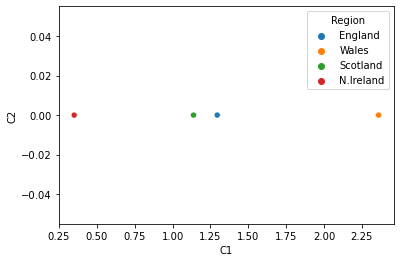

In [175]:
# Plot
sns.scatterplot(data=results,x='C1',y='C2',hue='Region')